**Map  Flux from Segmentation Map**

Step 1: Load the FITS Image and Segmentation Map

In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

Filename: frame-r-005071-3-0347.fits.bz2
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      96   (2048, 1489)   float32   
  1                1 ImageHDU         6   (2048,)   float32   
  2                1 BinTableHDU     27   1R x 3C   [49152E, 2048E, 1489E]   
  3                1 BinTableHDU     79   1R x 31C   [J, 3A, J, A, D, D, 2J, J, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, E, E]   


/tmp/ipython-input-558725393.py:5: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(source_image[0].data))


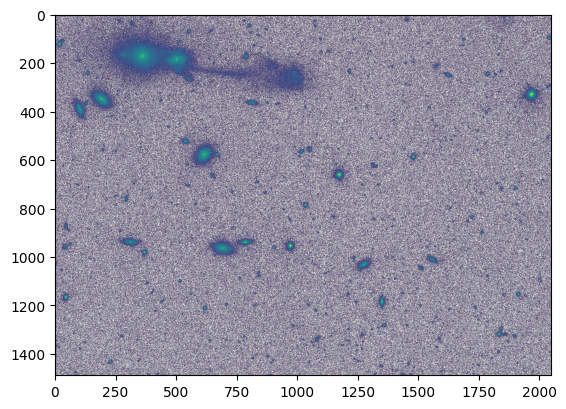

In [6]:
source_image=fits.open('frame-r-005071-3-0347.fits.bz2')
source_image.info()

#plot this img
plt.imshow(np.log10(source_image[0].data))
plt.show()

Filename: sdss_segmentation.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   (2048, 1489)   int32   


/tmp/ipython-input-56279932.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(seg_map[0].data))


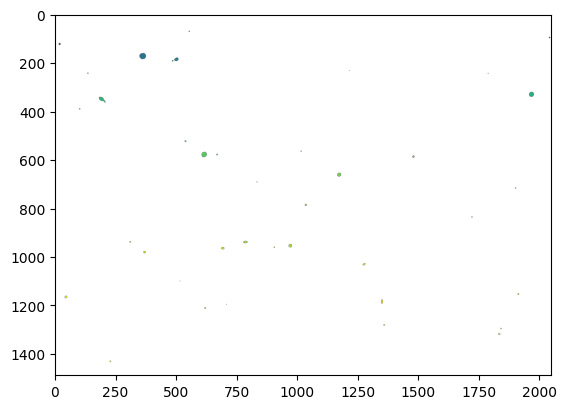

In [11]:
# Load Segmentation Map
seg_map=fits.open('sdss_segmentation.fits')
seg_map.info()
plt.imshow(np.log10(seg_map[0].data))
plt.show()

Step 2: Identify unique sources

In [13]:
# my unique source is labeled as 6 in seg fits file
object_label = 6

#create a mask boolean
object_mask = (seg_map[0].data==object_label)
object_mask.shape

(1489, 2048)

In [16]:
# Create a new image array as same shape, give to 0 values
new_pixels= np.zeros_like(source_image[0].data)
new_pixels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype='>f4')

Step 3: Mask Object flux Map

In [17]:
new_pixels[object_mask]=source_image[0].data[object_mask]
new_pixels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype='>f4')

/tmp/ipython-input-4144764657.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(new_pixels))


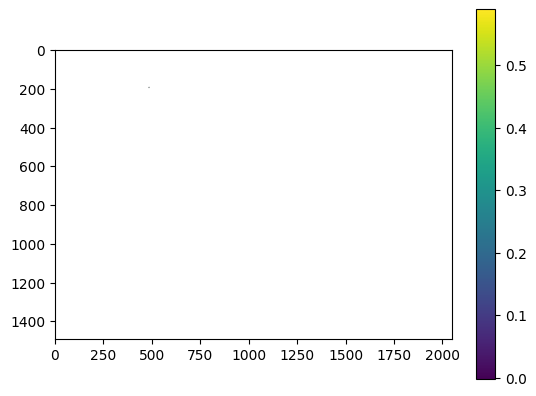

In [21]:
# plot extracted object flux map: 6
plt.imshow(np.log10(new_pixels))
plt.colorbar()
plt.show()

In [25]:
# save into fits image as a new entry
fits.writeto('extracted_object_flux.fits', new_pixels, overwrite=True)